In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import os
os.getcwd()

'/home/otoomet/tyyq/teaching/info371/demo'

# Data rotation example

          x         y
0 -0.116122 -0.437222
1  0.329851  0.423104
2  0.282891  0.020840
3  0.138039  0.327941
4 -0.427677 -0.250597
Variance by variable:
 x    0.802357
y    0.892366
dtype: float64


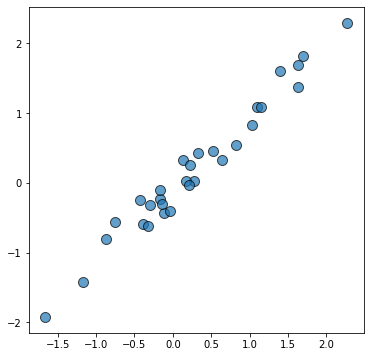

In [2]:
## Read and display data
data = pd.read_csv("pca.csv", sep="\t")
print(data.head())
plt.figure(figsize=(6,6))
plt.scatter(data.x, data.y, s=100, edgecolor="k", alpha=0.7)
print("Variance by variable:\n", data.apply(np.var, axis=0))

One can see that x and y have roughly equal variance

In [4]:
## perform PCA
## We just get component sizes, values, etc.
m = PCA().fit(data)
print("components:\n", m.components_)
print("explained_variance:", m.explained_variance_)
print("explained_variance_ratio:", m.explained_variance_ratio_)

components:
 [[-0.68773533 -0.72596152]
 [-0.72596152  0.68773533]]
explained_variance: [1.73809703 0.01506523]
explained_variance_ratio: [0.99140683 0.00859317]


Rotate data: we use the same PCA analysis as above, just now we
compute the rotated data instead of the components.

[[ 0.74603821 -0.14606377]
 [-0.1852367   0.12185289]
 [ 0.13908777 -0.1207071 ]
 [ 0.01576391  0.19565397]
 [ 0.82482345  0.20846087]]
Variance by variable:
 [1.68016046 0.01456305]


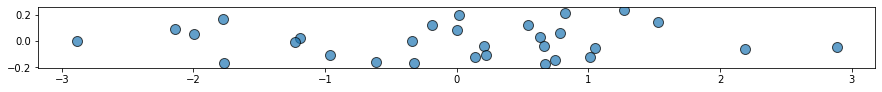

In [6]:
dataRot = m.transform(data)
print(dataRot[:5,:])
plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
ax.scatter(dataRot[:,0], dataRot[:,1], s=100,
          edgecolor="k", alpha=0.7)
ax.set_aspect("equal")
print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))

One can see that the first component has much larger variance than the
second one.

## Example with World Value Survey data

Selected variables from WVS 6th wave
* **motherWorks**: if mother works, children suffer (1: strongly agree, 4: strongly disagree)
* **maleLeaders**: men make better political leaders
* **collegeBoy**: college more important for boys
* **maleDecision**: men better executives
* **housewife**: being a housewife is fulfilling
* **environmentImportant**: looking after environment is important (1: very much like me, 6: not at all like me)
* **traditionImportant**: following customs important
* **trustAliens**: trust people of another nationality (1: completely, 4: not at all)
* **trustArmy**: trust the armed forces
* **strongLeader** (V127): having a strong leader who does not have to bother with elections (1: very good, 4: very bad)
* **religionRules** (V153): whenever science and religion conflict, religion is always right (1: strongly agree, 4: strongly disagree)
* **onlyMyReligion**: the only acceptable religion is my religion

In [7]:
wvs = pd.read_csv("../../data/wvs-pca-subset.csv.bz2", sep="\t")
wvs.head()

motherWorks  maleLeaders  collegeBoy  maleDecisions  housewife  \
0            1            1           1              1          1   
1            2            1           2              3          2   
2            1            1           1              1          1   
3            2            2           2              2          2   
4            2            1           3              2          2   

   environmentImportant  traditionImportant  trustAliens  trustArmy  \
0                     3                   3            2          3   
1                     2                   2            3          1   
2                     2                   2            4          2   
3                     2                   3            3          3   
4                     2                   3            3          3   

   strongLeader  religionRules  onlyMyReligion continent  region  
0             1              1               2    Africa      12  
1             1              1               1    Africa      12  
2             1              2               3    Africa      12  
3             2              2               3    Africa      12  
4             2              2               3    Africa      12

In [8]:
X =  wvs[["maleLeaders", "collegeBoy", "maleDecisions"]].values
m = PCA().fit(X)
print("components:\n", m.components_.T)
print("explained_variance_ratio:", m.explained_variance_ratio_)

components:
 [[-0.60415835  0.53683982 -0.58889362]
 [-0.49585175 -0.8317785  -0.24955075]
 [-0.62379783  0.14123577  0.76871889]]
explained_variance_ratio: [0.67335934 0.1987171  0.12792356]


### Exercise

Perform PCA with the above three family values _and_ concern about environment ( _environmentImportant_ ).  Do people who value environment more tend to be liberal or conservative in terms of family values?

## Example of regression with dimensionality reduction

How well do family values explain desire for a strong leader?
Run a regression:
$$leader_i = \beta_0 + \beta_1 maleLeaders_i + \beta_2 collegeBoy_i + beta_3 maleDecisions_i + \epsilon_i$$

thereafter run
$$leader_i = \beta_0 + \beta_1 PCA1_i + \epsilon_i$$


In [9]:
# x1 only
res1 = smf.ols(formula='strongLeader ~ maleLeaders + collegeBoy + maleDecisions', 
               data=wvs).fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           strongLeader   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     386.8
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          6.79e-249
Time:                        08:16:15   Log-Likelihood:                -87594.
No. Observations:               60105   AIC:                         1.752e+05
Df Residuals:                   60101   BIC:                         1.752e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1080      0.015    139.138      0.000       2.078       2.138
maleLeaders       0.0204      0.005      3.738      0.000       0.010       0.031
collegeBoy        0.1315      0.005     25.115      0.000       0.121       0.142
maleDecisions     0.0194      0.006      3.347      0.001       0.008       0.031
==============================================================================
Omnibus:                    35159.018   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3339.321
Skew:                          -0.052   Prob(JB):                         0.00
Kurtosis:                       1.850   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X =  wvs[["maleLeaders", "collegeBoy", "maleDecisions"]].values
print("Original data:\n", X[:5,:])
m = PCA().fit(X)
print("components:\n", m.components_.T)
print("explained_variance_ratio:\n", m.explained_variance_ratio_)
XRot = m.transform(X)
print("Rotated data:\n", XRot[:5,:])
wvsRot = pd.DataFrame(XRot, columns=["PC1", "PC2", "PC3"])
wvsRot["strongLeader"] = wvs.strongLeader
print("Rotated data frame:\n", wvsRot.head())

res2 = smf.ols(formula='strongLeader ~ PC1', data=wvsRot).fit()
res2.summary()


Original data:
 [[1 1 1]
 [1 2 3]
 [1 1 1]
 [2 2 2]
 [1 3 2]]
components:
 [[-0.60415835  0.53683982 -0.58889362]
 [-0.49585175 -0.8317785  -0.24955075]
 [-0.62379783  0.14123577  0.76871889]]
explained_variance_ratio:
 [0.67335934 0.1987171  0.12792356]
Rotated data:
 [[ 2.77950904  0.62716948  0.11681126]
 [ 1.03606163  0.07786251  1.40469829]
 [ 2.77950904  0.62716948  0.11681126]
 [ 1.05570111  0.47346657  0.04708578]
 [ 1.1640077  -0.89515175  0.38642866]]
Rotated data frame:
         PC1       PC2       PC3  strongLeader
0  2.779509  0.627169  0.116811             1
1  1.036062  0.077863  1.404698             1
2  2.779509  0.627169  0.116811             1
3  1.055701  0.473467  0.047086             2
4  1.164008 -0.895152  0.386429             2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           strongLeader   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     850.4
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          1.17e-185
Time:                        08:16:15   Log-Likelihood:                -87747.
No. Observations:               60105   AIC:                         1.755e+05
Df Residuals:                   60103   BIC:                         1.755e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5917      0.004    609.890      0.000       2.583       2.600
PC1           -0.0896      0.003    -29.162      0.000      -0.096      -0.084
==============================================================================
Omnibus:                    41905.761   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3459.392
Skew:                          -0.040   Prob(JB):                         0.00
Kurtosis:                       1.827   Cond. No.                         1.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Example with mnist digits

In [11]:
digits = pd.read_csv("../data/mnist8.csv.bz2", sep="\t").values
print(digits[:5,200:210])
print(digits.shape)

[[  0   0   0   0   0   0   9 184 254 253]
 [  0   0   0   0   0   0  20  50 107 197]
 [  0   0   0   0   0   0   0  43 237 253]
 [  0   0   0 132 240 242 252 252 252 252]
 [  0   0   0   0   0  87 238 254 246 228]]
(974, 784)


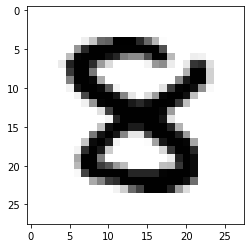

In [12]:
img = digits[77].reshape((28,28))
plt.imshow(img, cmap="gray_r")

In [13]:
pca = PCA().fit(digits)
digitsTr = pca.transform(digits)
print(digitsTr[:5,200:204])

[[-2.13573431e+01  5.47380550e+01  4.49154284e+01  1.08457769e-02]
 [-2.12903408e+01 -6.02578859e+01  8.23157329e+00  6.50193219e+00]
 [ 1.24661277e+01 -5.13165975e+01 -8.70539977e+00 -2.63167117e+01]
 [ 2.81567382e+01  1.52836626e+01 -8.37230233e+00  6.05503512e+01]
 [ 4.12976748e+00 -1.67703731e+01 -1.04741560e+01 -5.38748440e+01]]


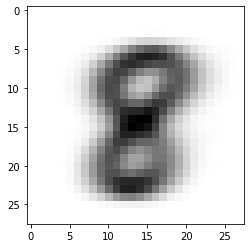

In [14]:
digitsTr = pca.transform(digits)
digitsTr[:,1:] = 0
digitsTr[:,0] = 1
#digitsTr[:,:1] = 0
digitsReduced = pca.inverse_transform(digitsTr)
img = digitsReduced[77].reshape((28,28))
plt.imshow(img, cmap="gray_r")